# Theory

Consider the following reaction, using two reactants $A$ and $B$:

\begin{align}
&A + B \to AB \\
&B + AB \to ABB
\end{align}

Given that they have the same (unrealistic) rate of reaction, what is the possible highest yield of $AB$?

The rate equations associated with the reactions are

\begin{align}
\mathrm{Rate\ 1} &= k_1 [A][B]\\
\mathrm{Rate\ 2} &= k_2 [AB][B]
\end{align}

We can see that we have a few dials to twiddle: the rate constants, the initial concentrations of $A$ and $B$, and even the concentrations of the end products. Given identical initial concentrations, what is the final concentration of $AB$?

## Numerical Integration

The technique used in this example is numberical integration. The rate equations tell us how fast the reaction proceeds. In other words, it tells us the change in concentration of the reagents and products. The first reaction alone tells us the production and consumption of the compounds:


\begin{align}
\frac{\mathrm{d}}{\mathrm{d}t}[AB] &= k_{1}[A][B] \\
\frac{\mathrm{d}}{\mathrm{d}t}[A] &= - k_{1}[A][B] \\
\frac{\mathrm{d}}{\mathrm{d}t}[B] &= - k_{1}[A][B]
\end{align}

Note that the sign is negative for reagents (consumption) and positive for products (production).

One way we can model this is using very small steps in time, $\mathrm{d}t$, and finding the small change in concentration at that time, $\mathrm{d}[AB]$. Using the first equation, we can write the change in concentration as

$$
\mathrm{d}[AB] = k_1 [A][B] \mathrm{d}t
$$

and at the next instance in time, $t + \mathrm{d}t$, we have the concentration $[AB] + \mathrm{d}[AB]$. Repeating this for every step in time, we can trace the evolution of the concentrations of the chemicals.

Note that the smaller the step in time, the more accurate the simulation will be. Time in reality flows continously, and the closer we approach this continuum, the more accurate results we will obtain.

# Simulation

## Libraries

First, we need to import the libraries required. We will use only *mathplotlib.pyplot* for plotting.

In [43]:
import matplotlib.pyplot as plt

## Initialisation of Variables

Next, we define our initial conditions. We will use a list to store the concentrations of the compounds. The concentration at each step in time is referenced from the back of the list, calculated, then appended on to the back. This gives us a list of concentrations over time.

The initial concentrations are initialised in the list already.

In [44]:
conc_A = [1]
conc_B = [1]
conc_AB = [0]
conc_ABB = [0]

We also put the rate constants here for easy reference and changing later if needed.

In [45]:
k1 = 1
k2 = 1

We also define the time steps we will use (1 ms) and the total run time we want (10 s).

In [46]:
dt = 0.001
runtime = 10

## Equations needed

The rate of reactions of chemicals are governed by the rate equations, which relates the rate of production (and consumption) of compounds to the concentration of the reactants. This assumes an irreversible reaction, as well as reaction of order $1$, and a constant rate constant.

We can write down the change in the compounds over time:

\begin{align}
\frac{\mathrm{d}}{\mathrm{d}t}[AB] &= k_{1}[A][B] - k_{2}[AB][B] \\
\frac{\mathrm{d}}{\mathrm{d}t}[A] &= - k_{1}[A][B] \\
\frac{\mathrm{d}}{\mathrm{d}t}[B] &= - k_{1}[A][B] - k_{2}[AB][B]\\
\frac{\mathrm{d}}{\mathrm{d}t}[ABB] &= k_{2}[AB][B] \\
\end{align}


## Simulation

We will  run the simulation in a while loop. It checks if the current time exceeds our run time, and processes the equations step-by-step.

In [47]:
current = 0                 # Our starting time

while current <= runtime:   # If the time is less than defined run time,
    current += dt           # Update the current time

                            # Solve for the equations given above ^
    new_conc_A = conc_A[-1] - k1*conc_A[-1]*conc_B[-1]*dt
    new_conc_B = conc_B[-1] - k1*conc_A[-1]*conc_B[-1]*dt - k2*conc_B[-1]*conc_AB[-1]*dt

    new_conc_AB = conc_AB[-1] + k1*conc_A[-1]*conc_B[-1]*dt - k2*conc_AB[-1]*conc_B[-1]*dt
    new_conc_ABB = conc_ABB[-1] + k2*conc_AB[-1]*conc_B[-1]*dt

    # Append them to the end of their respective lists
    conc_A.append(new_conc_A)
    conc_B.append(new_conc_B)
    conc_AB.append(new_conc_AB)
    conc_ABB.append(new_conc_ABB)

## Plotting

We can now plot our results

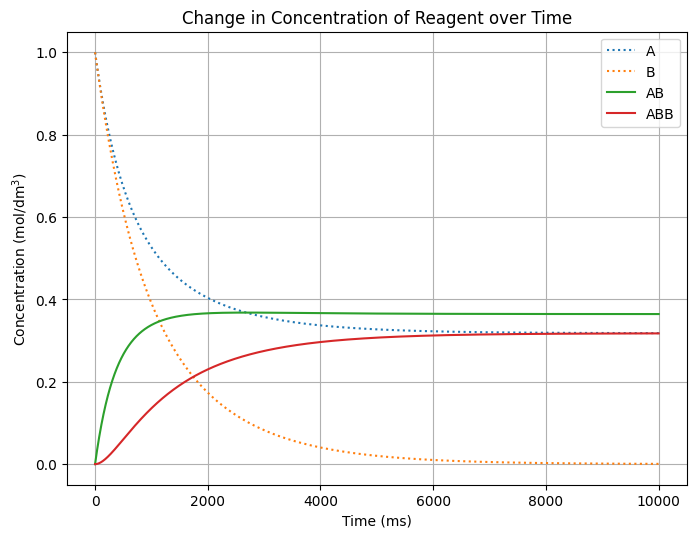

In [48]:
plt.figure(figsize = (8,6), dpi = 100)          # Sets the figure size

plt.plot(conc_A, ":", label = "A")              # Plots the various compound concentrations
plt.plot(conc_B, ":", label = "B")
plt.plot(conc_AB, label = "AB")
plt.plot(conc_ABB, label = "ABB")

                                                # Sets the labels of the zxes and title
plt.ylabel("Concentration (mol/dm$^3$)")
plt.xlabel("Time (ms)")
plt.title("Change in Concentration of Reagent over Time")

                                                # Makes the legend and bg grid
plt.legend()
plt.grid()

                                                # Plots the plot
plt.show()

# Extentions

1. Consider playing around with the starting conditions
2. Try another reaction that you are familiar with
3. Add more reactions onto the ones given
4. [Medium] What if the reactions were reversible?
5. [Hard] What if we had an endless series of chain reactions, e.g., ABBBBB + B $\to$ ABBBBBB, and so on.